# Import Dependencies

In [ ]:
import numpy as np
import tensorflow as tf
import keras as kr
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
import os
import cv2 # to read the image
import imghdr # to check if the file is an image
import matplotlib.pyplot as plt

In [ ]:
# what is os?

# In Python, os is a built-in module that provides a way to interact with the operating system. It allows you
# to perform various tasks related to the file system, environment variables, and system-specific functions.

os.path.join('DATASET', 'Organic')
os.listdir('/content/drive/MyDrive/Colab Notebooks/Waste_DS_Train')

['Inorganic', 'Organic']

# Remove Dodgy Images

In [ ]:
# Access Directory
data_dir = '/content/drive/MyDrive/Colab Notebooks/Waste_DS_Train'

# or you can give the path
# path = 'D:\ML&DL Projects\Waste_DS_Train'

In [ ]:
# List all the formats
image_ext = ['jpeg', 'jpg', 'png', 'bmp']
image_ext

['jpeg', 'jpg', 'png', 'bmp']

In [ ]:
# checking folders in the directory
os.listdir(data_dir)

['Inorganic', 'Organic']

In [ ]:
# accessing files from subfolders
os.listdir(os.path.join(data_dir, 'Organic'))

['O_8324.jpg',
 'O_8500.jpg',
 'O_9310.jpg',
 'O_9782.jpg',
 'O_8433.jpg',
 'O_935.jpg',
 'O_8739.jpg',
 'O_9624.jpg',
 'O_971.jpg',
 'O_9697.jpg',
 'O_9498.jpg',
 'O_9749.jpg',
 'O_9048.jpg',
 'O_8993.jpg',
 'O_9000.jpg',
 'O_8616.jpg',
 'O_9733.jpg',
 'O_9633.jpg',
 'O_8601.jpg',
 'O_8449.jpg',
 'O_9525.jpg',
 'O_854.jpg',
 'O_9680.jpg',
 'O_9012.jpg',
 'O_8876.jpg',
 'O_9548.jpg',
 'O_8677.jpg',
 'O_943.jpg',
 'O_9042.jpg',
 'O_9708.jpg',
 'O_9640.jpg',
 'O_897.jpg',
 'O_9565.jpg',
 'O_9009.jpg',
 'O_8966.jpg',
 'O_9032.jpg',
 'O_8590.jpg',
 'O_9505.jpg',
 'O_8498.jpg',
 'O_9244.jpg',
 'O_9321.jpg',
 'O_9448.jpg',
 'O_9137.jpg',
 'O_8406.jpg',
 'O_9173.jpg',
 'O_9041.jpg',
 'O_8465.jpg',
 'O_9015.jpg',
 'O_9777.jpg',
 'O_9665.jpg',
 'O_8627.jpg',
 'O_9572.jpg',
 'O_929.jpg',
 'O_9345.jpg',
 'O_8314.jpg',
 'O_9794.jpg',
 'O_9383.jpg',
 'O_9571.jpg',
 'O_8515.jpg',
 'O_985.jpg',
 'O_942.jpg',
 'O_9495.jpg',
 'O_9120.jpg',
 'O_8400.jpg',
 'O_8569.jpg',
 'O_952.jpg',
 'O_9643.jpg',
 'O_

In [ ]:
for image_class in os.listdir(data_dir):
    print(image_class)
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in  image_ext:
                print('Not an image')
                os.remove(image_path)
        except Exception as e:
            print('Issue with file: ', format(image_path))

Streaming output truncated to the last 5000 lines.
O_2851.jpg
O_3057.jpg
O_2804.jpg
O_3083.jpg
O_2944.jpg
O_2862.jpg
O_2882.jpg
O_2796.jpg
O_3090.jpg
O_2902.jpg
O_2913.jpg
O_2811.jpg
O_2785.jpg
O_3004.jpg
O_3056.jpg
O_2892.jpg
O_2871.jpg
O_3074.jpg
O_2825.jpg
O_2795.jpg
O_3010.jpg
O_2773.jpg
O_2955.jpg
O_3062.jpg
O_1238.jpg
O_12161.jpg
O_12334.jpg
O_12160.jpg
O_12322.jpg
O_12361.jpg
O_12363.jpg
O_12239.jpg
O_1223.jpg
O_12252.jpg
O_12383.jpg
O_12157.jpg
O_12215.jpg
O_12301.jpg
O_12186.jpg
O_12202.jpg
O_12382.jpg
O_12266.jpg
O_1226.jpg
O_12168.jpg
O_12353.jpg
O_12261.jpg
O_12271.jpg
O_1237.jpg
O_12310.jpg
O_12330.jpg
O_12231.jpg
O_12167.jpg
O_12351.jpg
O_1229.jpg
O_12312.jpg
O_1216.jpg
O_12391.jpg
O_12384.jpg
O_12279.jpg
O_12249.jpg
O_12244.jpg
O_12152.jpg
O_122.jpg
O_12288.jpg
O_12199.jpg
O_12201.jpg
O_12324.jpg
O_12395.jpg
O_12315.jpg
O_12319.jpg
O_12248.jpg
O_12159.jpg
O_12321.jpg
O_12214.jpg
O_12227.jpg
O_12257.jpg
O_12300.jpg
O_12273.jpg
O_12329.jpg
O_12284.jpg
O_12333.jpg
O_12340.j

In [ ]:
img = cv2.imread(os.path.join(data_dir, 'Organic', 'O_1.jpg'))
img.shape

(242, 208, 3)

# Printing Images

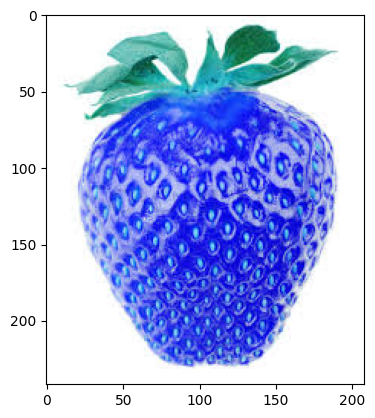

In [ ]:
plt.imshow(img)

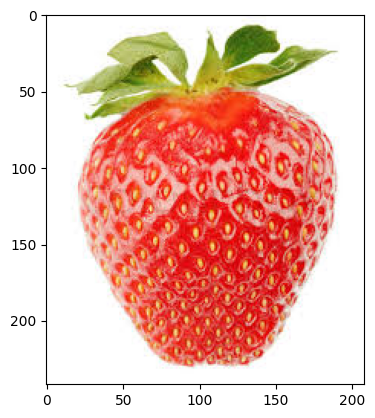

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# opencv reads image in BGR and matplotlib reads image in RGB
# so convert BGR to RGB

plt.show()

# Loading Data

In [ ]:
# tf.data API is used to build pipelines to feed data into your model during training and inference.
# it simplifies the process of loading, processing, and managing large datasets for training deep learning models.
# A data pipeline is a series of data processing steps that involve the collection, transformation,
# and movement of data from one or more sources to one or more destinations.

# we will use keras image dataset from directory to load the data
# tf.keras.utils.image_dataset_from_directory('Waste_DS_Train') is a convenient utility provided by
# TensorFlow and Keras to quickly create a dataset from image files organized in directories. While it
# uses the tf.data API under the hood, it is specifically designed for loading image datasets, making it
# more user-friendly for common image classification tasks.


In [ ]:
tf.data.Dataset??

In [ ]:
tf.keras.utils.image_dataset_from_directory??

Object `tf.keras.utils.image_dataset_from_directory` not found.


In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)
# this creates date pipeline
# this is just a generator
# this will not allow you to print data
# for that purpose you have to convert it into numpy array

Found 25097 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()
# now this will allow to access that pipeline or generator
# this is allowing to loop through

In [ ]:
batch = data_iterator.next()
# this will give the first batch of images ana labels
# if you want to access the next batch then again you have to use data_iterator.next()

In [ ]:
print(len(batch)) # it should be 2 (one for images and one for label)
print(batch) # this will print batch of images and labels
print(batch[0].shape) # this will total images in batch, their shape and dimension

2
(array([[[[106.        , 112.        , 102.        ],
         [106.00377   , 112.00377   , 102.00377   ],
         [106.81209   , 112.81209   , 102.81209   ],
         ...,
         [139.4043    , 146.5957    , 136.        ],
         [139.        , 147.        , 136.        ],
         [139.        , 147.        , 136.        ]],

        [[106.01758   , 112.01758   , 102.01758   ],
         [106.66016   , 112.66016   , 102.66016   ],
         [107.421875  , 113.421875  , 103.421875  ],
         ...,
         [139.42188   , 146.61328   , 136.01758   ],
         [139.01758   , 147.01758   , 136.01758   ],
         [139.01758   , 147.01758   , 136.01758   ]],

        [[107.0293    , 113.0293    , 103.0293    ],
         [107.671875  , 113.671875  , 103.671875  ],
         [108.445435  , 114.445435  , 104.445435  ],
         ...,
         [140.4336    , 147.625     , 137.0293    ],
         [140.0293    , 148.0293    , 137.0293    ],
         [140.0293    , 148.0293    , 137.0293    

In [ ]:
batch[1]

array([0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int32)

Check for assigned classes

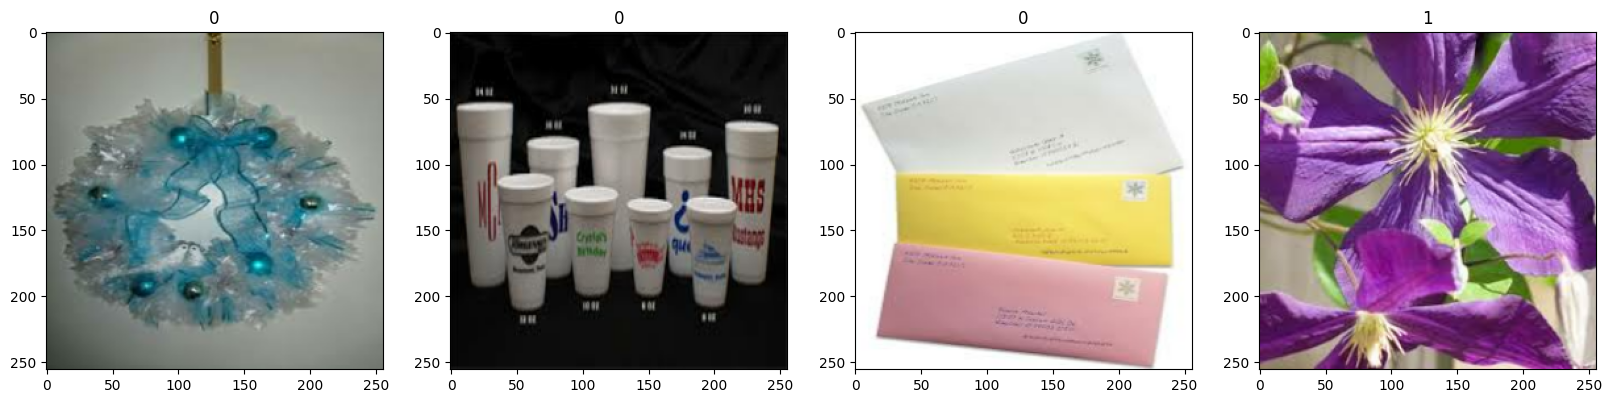

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype('int'))
    ax[idx].title.set_text(batch[1][idx])
# The enumerate function in Python is used to loop over an iterable (such as a list, tuple, or string)
# while keeping track of the index of the current item.

Organic Class = 1 & Inorganic Class = 0

# Data Pre-Processing

1. Scale
2. Split

In [ ]:
# for image data we need to do pre-process by scaling image values between 0 and 1 instead of 0 and 255
# this helps our deep learning model generalize faster and produce better results

# we also split our data into training, validation and test sets to avoid overfitting

In [ ]:
print(batch[0].shape)
print(batch[0].min())
print(batch[0].max())

# when we load data in image representation then it is in the form of 0 to 255
# so we have to scale it between 0 and 1
# when you are dealing with deep learning model you should scale data it help optimization a ton faster

(32, 256, 256, 3)
0.0
255.0


Data Scaling

In [ ]:
# we can scale data by dividing it by 255
# scaled = batch[0]/255
# but it will scale on that batch of data
# we need whole data to be scaled
# for that purpose we will use map function
# map function will apply a function to each element of the dataset

In [ ]:
data = data.map(lambda x, y: (x/255, y))

In [ ]:
# data: This is a dataset that contains pairs of (x, y), where x is an image data and y is a label associated
# with that image.

# map(): This is a method often used in programming to apply a given function to each element of a dataset
# (or list, array, etc.) and create a new dataset with the transformed values.

# lambda x, y: (x/255, y): This is a lambda function, which is an anonymous inline function that takes two
# arguments, x and y, and returns a tuple where the first element is the result of dividing x by 255 and the
# second element is y.

In [ ]:
data.as_numpy_iterator().next()[0].min()

0.0

In [ ]:
# direct check without assigning to variable
data.as_numpy_iterator().next()[0].max()

1.0

In [ ]:
# check by assigning to variable
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()

In [ ]:
print(batch[0].min())
print(batch[0].max())

0.0
1.0


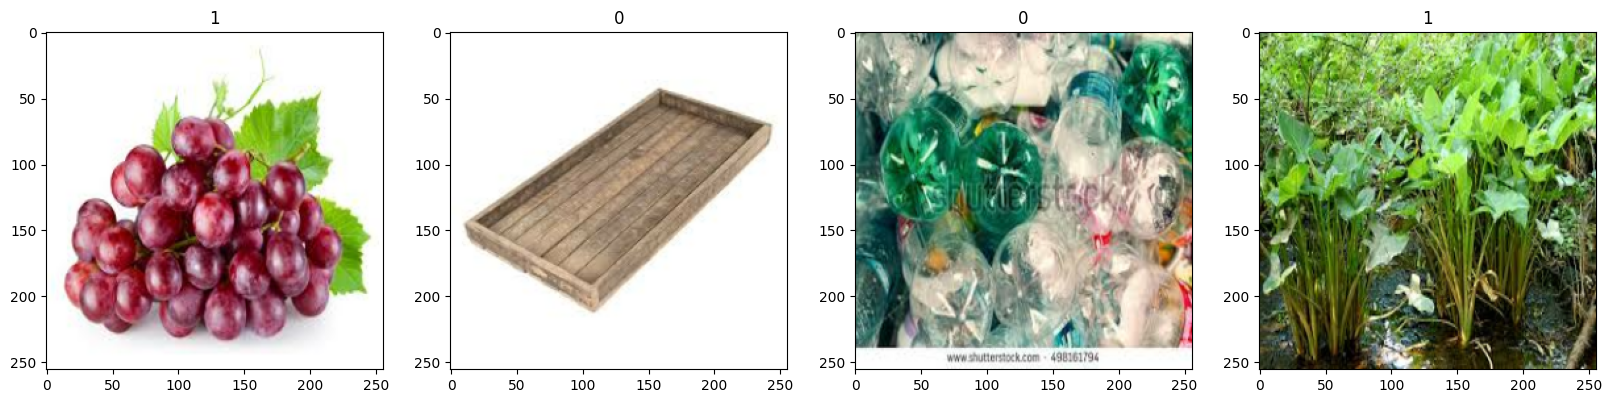

In [ ]:
fig, ax = plt.subplots(ncols = 4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img) # removing type bcz data is no longer int after scaling
    ax[idx].title.set_text(batch[1][idx])

Data Splitting

In [ ]:
len(data)

785

In [ ]:
# 784 bactches and each batch with 32 images
# 784*32 = 25088 images

In [ ]:
train_size = int(0.7*len(data))
val_size = int(0.15*len(data))+1
test_size = int(0.15*len(data))+1

In [ ]:
# When you calculate the size of the validation set and the test set as a percentage of the total data,
# there may be cases where the percentage calculation results in a fractional number of data points.
# In such cases, rounding up to the nearest whole number (by adding 1) ensures that you have at least
# one data point in the validation set.

In [ ]:
print(train_size)
print(val_size)
print(test_size)

549
118
118


In [ ]:
train_size+val_size+test_size

785

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
print(len(train))
print(len(val))
print(len(test))

549
118
118


# Deep Model

Model

In [ ]:
# tf.random.set_seed(1234)
# lambdas = [0.0, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3]
# models=[None] * len(lambdas)

# for i in range(len(lambdas)):
#     lambda_ = lambdas[i]
#     models[i] = Sequential(
#         [
#             Conv2D(16, (3,3), 1, activation = 'relu', input_shape= (256,256,3), kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
#             # 16 filters, 3*3 kernel size, 1 stride
#             MaxPooling2D(),

#             Conv2D(32, (3,3), 1, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
#             MaxPooling2D(),

#             Conv2D(16, (3,3), 1, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
#             MaxPooling2D(),

#             # flatten dataset before using dense layer because dense layer takes 1D data
#             Flatten(),

#             Dense(256, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
#             Dense(1, activation = 'sigmoid', kernel_regularizer=tf.keras.regularizers.l2(lambda_))

#         ]
#     )

#     models[i].compile( optimizer=tf.keras.optimizers.Adam(0.01), loss= 'binary_crossentropy', metrics = ['accuracy'])

#     models[i].fit(train, epochs = 10, validation_data = val, callbacks = [tensorboard_callback])
#     print(f"Finished lambda = {lambda_}")


In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape= (256,256,3), kernel_regularizer=tf.keras.regularizers.l2(0.001)))
# 16 filters, 3*3 kernel size, 1 stride
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation = 'relu',  kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation = 'relu',  kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(MaxPooling2D())

# flatten dataset before using dense layer because dense layer takes 1D data
model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(256, activation = 'relu',  kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(Dense(1, activation = 'sigmoid',  kernel_regularizer=tf.keras.regularizers.l2(0.001)))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

Training

In [ ]:
logdir = '/content/drive/MyDrive/Colab Notebooks/logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [ ]:
hist = model.fit(train, epochs = 15, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/15
549/549 [==============================] - 97s 154ms/step - loss: 0.5385 - accuracy: 0.8031 - val_loss: 0.4252 - val_accuracy: 0.8464
Epoch 2/15
549/549 [==============================] - 90s 163ms/step - loss: 0.4288 - accuracy: 0.8379 - val_loss: 0.4192 - val_accuracy: 0.8461
Epoch 3/15
549/549 [==============================] - 85s 153ms/step - loss: 0.4068 - accuracy: 0.8498 - val_loss: 0.3780 - val_accuracy: 0.8633
Epoch 4/15
549/549 [==============================] - 81s 148ms/step - loss: 0.3975 - accuracy: 0.8531 - val_loss: 0.3758 - val_accuracy: 0.8644
Epoch 5/15
549/549 [==============================] - 88s 160ms/step - loss: 0.3830 - accuracy: 0.8588 - val_loss: 0.3679 - val_accuracy: 0.8700
Epoch 6/15
549/549 [==============================] - 89s 162ms/step - loss: 0.3823 - accuracy: 0.8593 - val_loss: 0.3743 - val_accuracy: 0.8689
Epoch 7/15
549/549 [==============================] - 84s 153ms/step - loss: 0.3740 - accuracy: 0.8613 - val_loss: 0.3593 - val_ac

In [ ]:
hist

In [ ]:
hist.history

{'loss': [0.5385131239891052,
  0.428765207529068,
  0.40680959820747375,
  0.3974688649177551,
  0.38304266333580017,
  0.3822716474533081,
  0.3739963471889496,
  0.3635629117488861,
  0.36302193999290466,
  0.3573574423789978,
  0.3543718457221985,
  0.34773096442222595,
  0.348169207572937,
  0.343727171421051,
  0.3413091003894806],
 'accuracy': [0.8030509948730469,
  0.837943971157074,
  0.8498406410217285,
  0.8530851602554321,
  0.8588342666625977,
  0.8593465685844421,
  0.8612818717956543,
  0.8697062730789185,
  0.8677140474319458,
  0.8710724115371704,
  0.8728369474411011,
  0.8776752948760986,
  0.8784152865409851,
  0.8821721076965332,
  0.8826274871826172],
 'val_loss': [0.4251822829246521,
  0.4191969931125641,
  0.37799012660980225,
  0.37584367394447327,
  0.36794695258140564,
  0.374271035194397,
  0.3592835068702698,
  0.3831496834754944,
  0.35155004262924194,
  0.3764369487762451,
  0.35804498195648193,
  0.37098225951194763,
  0.35833826661109924,
  0.3796252310

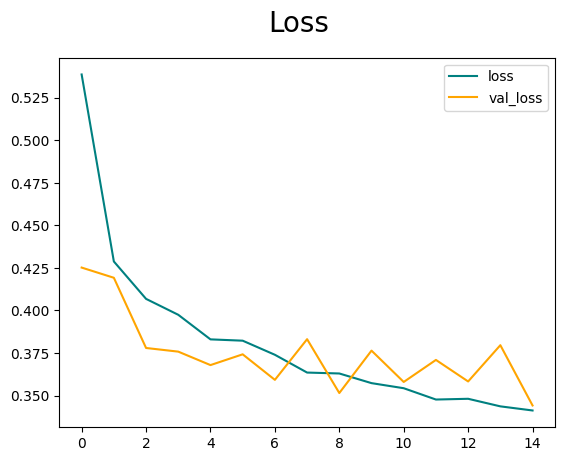

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color ='teal', label = 'loss')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'val_loss')
fig.suptitle('Loss', fontsize = 20)
plt.legend(loc = 'upper right')
plt.show()

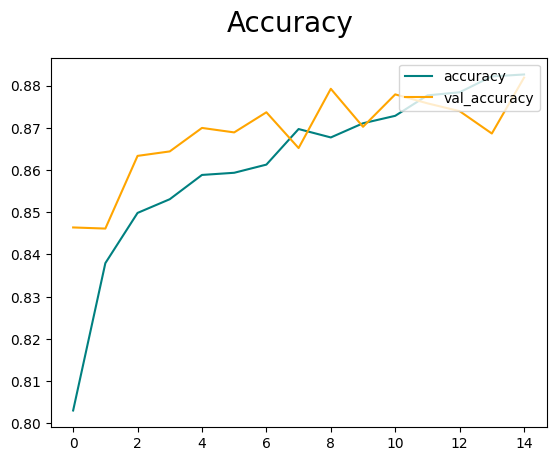

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color ='teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy', fontsize = 20)
plt.legend(loc = 'upper right')
plt.show()

# Evaluate Performance

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
len(test)

118

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 35ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.905717134475708, Recall: 0.8742138147354126, Accuracy: 0.880095899105072


# Testing Model

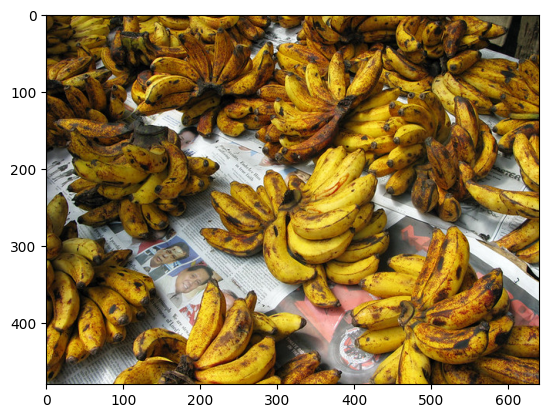

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/food3.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

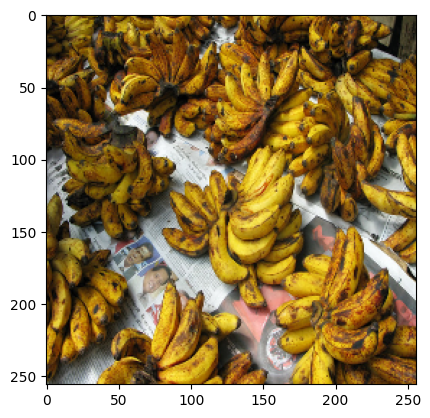

In [ ]:
# Assuming 'img' is the BGR image
rgb_image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize the RGB image
resize = tf.image.resize(rgb_image, (256, 256))

# Display the resized RGB image
plt.imshow(resize.numpy().astype(int))
plt.show()



In [ ]:
# for testing, NN demads to upload a batch not a single image.
# so we need to expand dimensions of image

In [ ]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 70.078125,  41.5625  ,  20.03125 ],
        [ 75.265625,  47.46875 ,  13.046875],
        [ 29.828125,  24.140625,   4.421875],
        ...,
        [ 60.59375 ,  55.59375 ,  36.34375 ],
        [ 57.84375 ,  55.84375 ,  34.84375 ],
        [ 51.171875,  48.171875,  31.390625]],

       [[ 75.625   ,  42.734375,  10.828125],
        [ 87.875   ,  54.53125 ,  20.890625],
        [ 45.375   ,  30.203125,  11.203125],
        ...,
        [ 62.703125,  58.90625 ,  39.4375  ],
        [ 62.296875,  59.296875,  42.421875],
        [ 45.96875 ,  43.96875 ,  31.28125 ]],

       [[ 84.8125  ,  51.1875  ,  13.71875 ],
        [ 89.4375  ,  57.359375,  13.      ],
        [ 81.96875 ,  61.25    ,  16.75    ],
        ...,
        [ 64.25    ,  62.      ,  41.5     ],
        [ 60.78125 ,  58.625   ,  43.078125],
        [ 47.3125  ,  45.3125  ,  32.140625]],

       ...,

       [[ 95.359375,  65.984375,  17.5     ],
        [ 71.

In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize, 0)

array([[[[ 70.078125,  41.5625  ,  20.03125 ],
         [ 75.265625,  47.46875 ,  13.046875],
         [ 29.828125,  24.140625,   4.421875],
         ...,
         [ 60.59375 ,  55.59375 ,  36.34375 ],
         [ 57.84375 ,  55.84375 ,  34.84375 ],
         [ 51.171875,  48.171875,  31.390625]],

        [[ 75.625   ,  42.734375,  10.828125],
         [ 87.875   ,  54.53125 ,  20.890625],
         [ 45.375   ,  30.203125,  11.203125],
         ...,
         [ 62.703125,  58.90625 ,  39.4375  ],
         [ 62.296875,  59.296875,  42.421875],
         [ 45.96875 ,  43.96875 ,  31.28125 ]],

        [[ 84.8125  ,  51.1875  ,  13.71875 ],
         [ 89.4375  ,  57.359375,  13.      ],
         [ 81.96875 ,  61.25    ,  16.75    ],
         ...,
         [ 64.25    ,  62.      ,  41.5     ],
         [ 60.78125 ,  58.625   ,  43.078125],
         [ 47.3125  ,  45.3125  ,  32.140625]],

        ...,

        [[ 95.359375,  65.984375,  17.5     ],
         [ 71.640625,  58.453125,  17.734375]

In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0)) # increasing dimensions and scaling

1/1 [==============================] - 0s 21ms/step


In [ ]:
yhat

array([[0.98975265]], dtype=float32)

In [ ]:
if yhat > 0.5:
  print('The waste is Organic')
else:
  print('The waste is inoganic')

The waste is Organic


# Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('/content/drive/MyDrive/Colab Notebooks/Models', 'Waste_Classification.h5'))

# Reloading

In [ ]:
new_model = load_model(os.path.join('/content/drive/MyDrive/Colab Notebooks/Models', 'Waste_Classification.h5'))

In [ ]:
new_model

In [ ]:
# now you can make predictions by just loading your new_model

In [ ]:
yhat_new_model = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 18ms/step


In [ ]:
yhat_new_model

array([[0.95233226]], dtype=float32)

In [ ]:
if yhat_new_model > 0.5:
  print('The waste is Organic')
else:
  print('The waste is inoganic')

The waste is Organic


# The End